In [13]:

import pandas as pd

# Load the CSV file
csv_file_path = '/media/manvendra/Elements/project_traffic/extract_videos_1000/videos/aggrMp4/gamma_1.75/cam_5rain_/detection_comparison_iou_gt_vs_trt.csv'
df = pd.read_csv(csv_file_path)

# Helper function to safely evaluate string representations of lists
def safe_eval(value):
    if isinstance(value, str):
        try:
            return eval(value)
        except:
            return value
    return value
# Apply the safe_eval function to convert string representations of lists to actual lists
df['Extra TRT Detection Locations'] = df['Extra TRT Detection Locations'].apply(safe_eval)
df['Extra GT Detection Locations'] = df['Extra GT Detection Locations'].apply(safe_eval)

# Calculate TRT and GT Differences for each frame
df['TRT Difference'] = (df['TRT Detections'] - df['GT Detections']).clip(lower=0)
df['GT Difference'] = (df['GT Detections'] - df['TRT Detections']).clip(lower=0)

# Calculate True Positives (TP) as the minimum of GT and TRT detections per frame
true_positives = df[['GT Detections', 'TRT Detections']].min(axis=1).sum()

# Calculate False Positives (FP) as extra detections made by TRT model
false_positives = df['TRT Difference'].sum()

# Calculate False Negatives (FN) as extra detections made by GT model
false_negatives = df['GT Difference'].sum()

# Calculate True Negatives (TN) as frames where both models detected zero objects
true_negatives = df[(df['GT Detections'] == 0) & (df['TRT Detections'] == 0)].shape[0]

# Calculate Precision, Recall, Accuracy, and F1 Score
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives) if (true_positives + false_positives + false_negatives + true_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Total number of frames where a detection difference is found
total_frames_with_difference = df[(df['TRT Difference'] != 0) | (df['GT Difference'] != 0)].shape[0]

# Total frames where GT > TRT and TRT > GT
frames_gt_more = df[df['GT Difference'] > 0].shape[0]
frames_trt_more = df[df['TRT Difference'] > 0].shape[0]

# Total number of frames analyzed
total_frames = df.shape[0]

# Calculate the average and median for GT > TRT
average_gt_more_detections = df[df['GT Difference'] > 0]['GT Difference'].mean()
median_gt_more_detections = df[df['GT Difference'] > 0]['GT Difference'].median()

# Calculate the average and median for TRT > GT
average_trt_more_detections = df[df['TRT Difference'] > 0]['TRT Difference'].mean()
median_trt_more_detections = df[df['TRT Difference'] > 0]['TRT Difference'].median()


tensorrt_model=[]
tensorrt_model.append(precision)
tensorrt_model.append(recall)
tensorrt_model.append(accuracy)
tensorrt_model.append(f1_score)
# Display the analysis results
print("==== Detection Analysis Report ====")
print(f"Total number of detections by GT model (True Positives): {true_positives}")
print(f"Total number of frames where a difference is found: {total_frames_with_difference}")
print(f"Total number of frames where GT made more detections than TRT: {frames_gt_more}")
print(f"Total number of frames where TRT made more detections than GT: {frames_trt_more}")
print(f"Total difference in detections where GT > TRT (False Negatives): {false_negatives}")
print(f"Total difference in detections where TRT > GT (False Positives): {false_positives}")
print(f"Total number of frames analyzed: {total_frames}")
print(f"True Negatives (frames with no detections by both models): {true_negatives}")
print(f"Average difference where GT > TRT: {average_gt_more_detections}")
print(f"Median difference where GT > TRT: {median_gt_more_detections}")
print(f"Average difference where TRT > GT: {average_trt_more_detections}")
print(f"Median difference where TRT > GT: {median_trt_more_detections}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")


==== Detection Analysis Report ====
Total number of detections by GT model (True Positives): 102300
Total number of frames where a difference is found: 6825
Total number of frames where GT made more detections than TRT: 4027
Total number of frames where TRT made more detections than GT: 2798
Total difference in detections where GT > TRT (False Negatives): 12567
Total difference in detections where TRT > GT (False Positives): 6585
Total number of frames analyzed: 8100
True Negatives (frames with no detections by both models): 0
Average difference where GT > TRT: 3.1206853737273406
Median difference where GT > TRT: 3.0
Average difference where TRT > GT: 2.3534667619728378
Median difference where TRT > GT: 2.0
Precision: 0.9395
Recall: 0.8906
Accuracy: 0.8423
F1 Score: 0.9144


In [23]:

import pandas as pd

# Load the CSV file
csv_file_path = '/media/manvendra/Elements/project_traffic/extract_videos_1000/videos/aggrMp4/gamma_1.75/cam_5rain_/detection_comparison_iou_gt_vs_pt.csv'
df1 = pd.read_csv(csv_file_path)

# Helper function to safely evaluate string representations of lists
def safe_eval(value):
    if isinstance(value, str):
        try:
            return eval(value)
        except:
            return value
    return value
# Apply the safe_eval function to convert string representations of lists to actual lists
df1['Extra PT Detection Locations'] = df1['Extra PT Detection Locations'].apply(safe_eval)
df1['Extra GT Detection Locations'] = df1['Extra GT Detection Locations'].apply(safe_eval)

# Calculate TRT and GT Differences for each frame
df1['PT Difference'] = (df1['PT Detections'] - df1['GT Detections']).clip(lower=0)
df1['GT Difference'] = (df1['GT Detections'] - df1['PT Detections']).clip(lower=0)

# Calculate True Positives (TP) as the minimum of GT and TRT detections per frame
true_positives = df1[['GT Detections', 'PT Detections']].min(axis=1).sum()

# Calculate False Positives (FP) as extra detections made by TRT model
false_positives = df1['PT Difference'].sum()

# Calculate False Negatives (FN) as extra detections made by GT model
false_negatives = df1['GT Difference'].sum()

# Calculate True Negatives (TN) as frames where both models detected zero objects
true_negatives = df1[(df1['GT Detections'] == 0) & (df1['PT Detections'] == 0)].shape[0]

# Calculate Precision, Recall, Accuracy, and F1 Score
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives) if (true_positives + false_positives + false_negatives + true_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Total number of frames where a detection difference is found
total_frames_with_difference = df1[(df1['PT Difference'] != 0) | (df1['GT Difference'] != 0)].shape[0]

# Total frames where GT > TRT and TRT > GT
frames_gt_more = df1[df1['GT Difference'] > 0].shape[0]
frames_pt_more = df1[df1['PT Difference'] > 0].shape[0]

# Total number of frames analyzed
total_frames = df1.shape[0]

# Calculate the average and median for GT > TRT
average_gt_more_detections = df1[df1['GT Difference'] > 0]['GT Difference'].mean()
median_gt_more_detections = df1[df1['GT Difference'] > 0]['GT Difference'].median()

# Calculate the average and median forTRT > GT
average_pt_more_detections = df1[df1['PT Difference'] > 0]['PT Difference'].mean()
median_pt_more_detections = df1[df1['PT Difference'] > 0]['PT Difference'].median()

# Display the analysis results
print("==== Detection Analysis Report ====")
print(f"Total number of detections by GT model (True Positives): {true_positives}")
print(f"Total number of frames where a difference is found: {total_frames_with_difference}")
print(f"Total number of frames where GT made more detections than PT: {frames_gt_more}")
print(f"Total number of frames where PT made more detections than GT: {frames_pt_more}")
print(f"Total difference in detections where GT > PT (False Negatives): {false_negatives}")
print(f"Total difference in detections where PT > GT (False Positives): {false_positives}")
print(f"Total number of frames analyzed: {total_frames}")
print(f"True Negatives (frames with no detections by both models): {true_negatives}")
print(f"Average difference where GT > PT: {average_gt_more_detections}")
print(f"Median difference where GT > PT: {median_gt_more_detections}")
print(f"Average difference where PT > GT: {average_pt_more_detections}")
print(f"Median difference where PT > GT: {median_pt_more_detections}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")

pt_model=[]
pt_model.append(precision)
pt_model.append(recall)
pt_model.append(accuracy)
pt_model.append(f1_score)


==== Detection Analysis Report ====
Total number of detections by GT model (True Positives): 96375
Total number of frames where a difference is found: 7111
Total number of frames where GT made more detections than PT: 5224
Total number of frames where PT made more detections than GT: 1887
Total difference in detections where GT > PT (False Negatives): 18492
Total difference in detections where PT > GT (False Positives): 3885
Total number of frames analyzed: 8100
True Negatives (frames with no detections by both models): 0
Average difference where GT > PT: 3.5398162327718223
Median difference where GT > PT: 3.0
Average difference where PT > GT: 2.0588235294117645
Median difference where PT > GT: 2.0
Precision: 0.9613
Recall: 0.8390
Accuracy: 0.8116
F1 Score: 0.8960


Metrics  ['Accuracy', 'Precision', 'Recall', 'F1-Score']
Metrics of tensorRt compared to ground truth  [0.939523350323736, 0.8905952101125649, 0.842308072324869, 0.9144052343666201]
Metrics of Pretrained compared to ground truth  [0.9612507480550568, 0.8390138159784795, 0.8115652789005658, 0.8959823732028058]


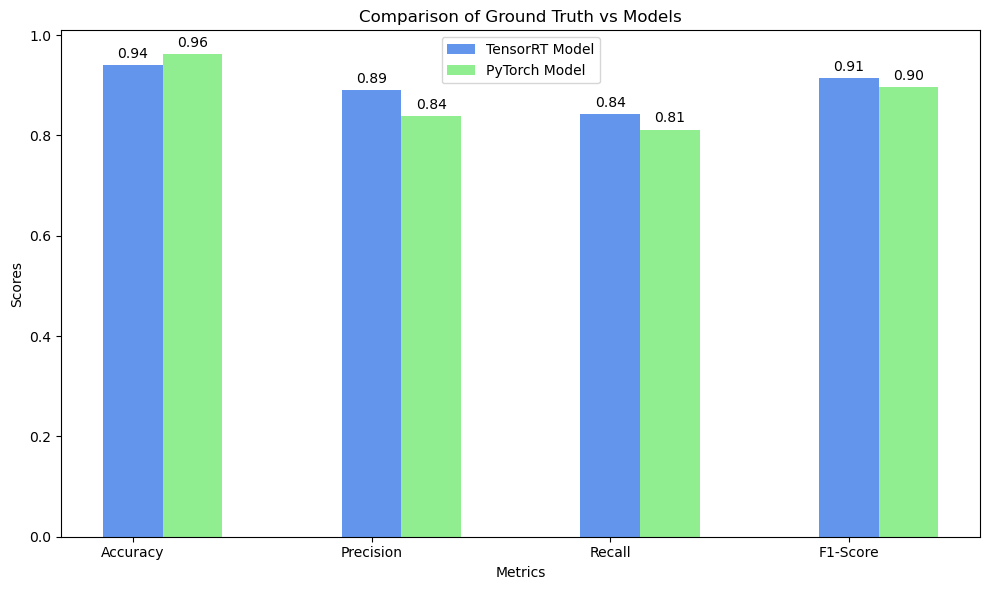

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and the corresponding values for Ground Truth, TensorRT, and PyTorch models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
# ground_truth = [0.95, 0.90, 0.92, 0.91]
# tensorrt_model = [0.92, 0.89, 0.91, 0.90]
# pt_model = [0.93, 0.88, 0.90, 0.89]
print("Metrics ",metrics)
print("Metrics of tensorRt compared to ground truth ",tensorrt_model)
print("Metrics of Pretrained compared to ground truth ",pt_model)
# Set the position of the bars on the x-axis
x = np.arange(len(metrics))

# Define the width of the bars
width = 0.25

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for Ground Truth, TensorRT, and PyTorch models
# bars_gt = ax.bar(x - width, ground_truth, width, label='Ground Truth', color='lightgray')
bars_trt = ax.bar(x, tensorrt_model, width, label='TensorRT Model', color='cornflowerblue')
bars_pt = ax.bar(x + width, pt_model, width, label='PyTorch Model', color='lightgreen')

# Add labels, title, and customize the graph
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Ground Truth vs Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display the values on top of the bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add values for each bar
# add_values(bars_gt)
add_values(bars_trt)
add_values(bars_pt)

# Show the plot
plt.tight_layout()
plt.savefig('Model metrics.png')
plt.show()
